# **1. Walkthrough**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
df = df.drop(columns = ['Product_Category_2','Product_Category_3'])

In [7]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

# **2. Analyzing Columns**

In [8]:
df.shape

(537577, 10)

In [9]:
df['User_ID'].nunique()

5891

In [10]:
df['Product_ID'].nunique()

3623

In [11]:
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [12]:
df['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [13]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [16]:
df['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [17]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [18]:
df['Purchase'].sum()

5017668378

In [19]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [20]:
for col in df.columns:
  print(col,df[col].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


# **3. Analyzing Gender**

In [21]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
df['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

<Axes: title={'center': 'Gender Ratio'}, ylabel='Gender'>

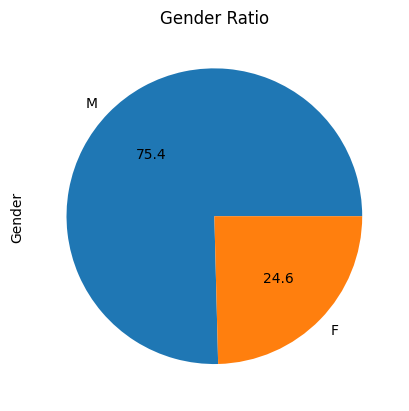

In [23]:
df['Gender'].value_counts().plot(kind = 'pie', autopct = '%.1f', title = 'Gender Ratio')

<Axes: xlabel='Gender', ylabel='count'>

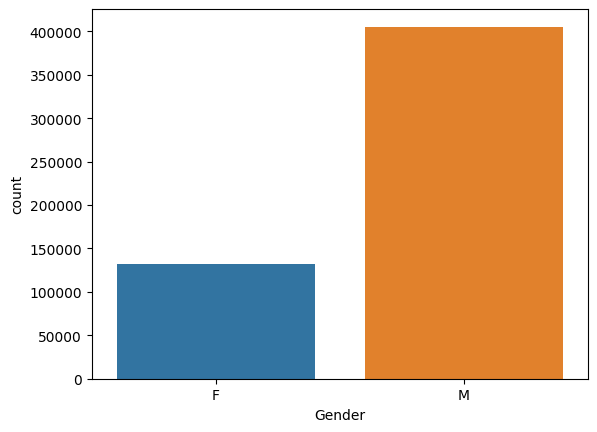

In [24]:
sns.countplot(x = 'Gender', data = df)

In [25]:
df.groupby('Gender').sum()['Purchase']

<ipython-input-25-7c37b6c0b896>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase']


Gender
F    1164624021
M    3853044357
Name: Purchase, dtype: int64

<ipython-input-26-d56ae83c41f9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = '%.1f')


<Axes: ylabel='Purchase'>

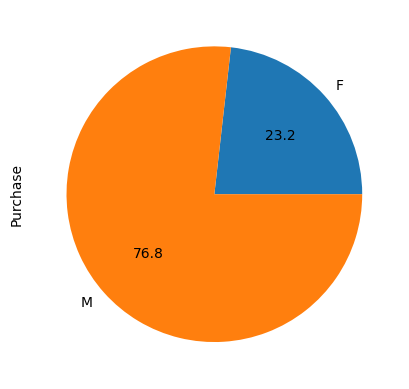

In [26]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = '%.1f')

<ipython-input-27-fe53cfa345a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = '%.1f')


<Axes: ylabel='Purchase'>

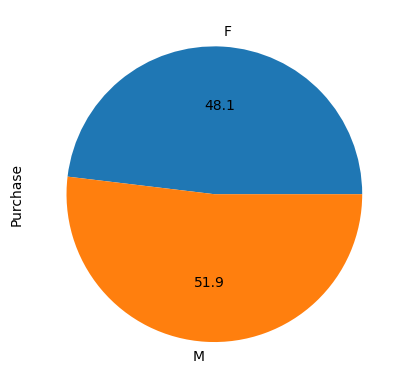

In [27]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = '%.1f')

In [28]:
df[df['Gender']=='M']['Purchase'].sum()

3853044357

In [29]:
df[df['Gender']=='F']['Purchase'].sum()

1164624021

In [30]:
df[df['Gender']=='M']['Purchase'].mean()

9504.771712960679

In [31]:
df[df['Gender']=='F']['Purchase'].mean()

8809.761348593387

# **4. Analyzing Age and Marital Status**

Text(0.5, 1.0, 'Purchase distribution by age')

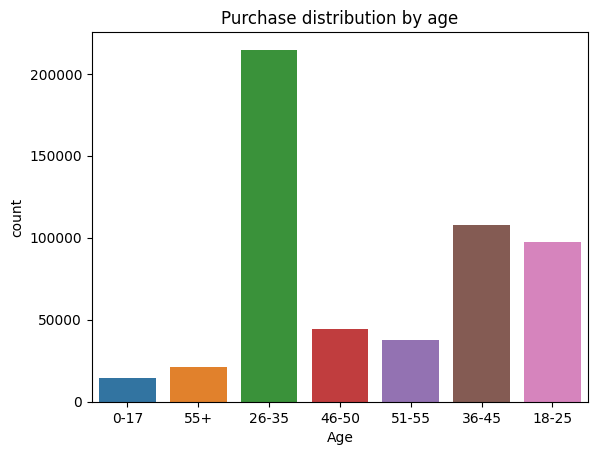

In [32]:
sns.countplot(x = 'Age', data = df)
plt.title('Purchase distribution by age')

In [33]:
for i in df['Age'].unique():
  print(i,":",len(df[df['Age']==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [34]:
lst = []
for i in df['Age'].unique():
  lst.append([i,df[df['Age']==i]['Purchase'].nunique()])

data = pd.DataFrame(lst, columns = ['Age','Products'])

In [35]:
data

,Age,Products
0,0-17,7544
1,55+,8292
2,26-35,15776
3,46-50,11351
4,51-55,10715
5,36-45,14308
6,18-25,13716


<Axes: xlabel='Age'>

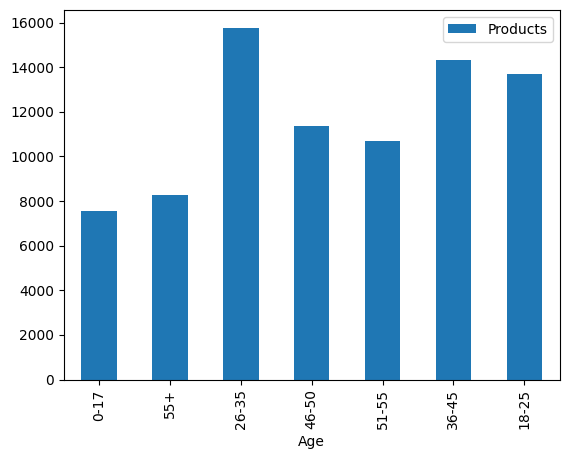

In [36]:
data.plot.bar(x = 'Age')

<ipython-input-37-203ca807bd7c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', title = 'Total amount spent by age')


<Axes: title={'center': 'Total amount spent by age'}, xlabel='Age'>

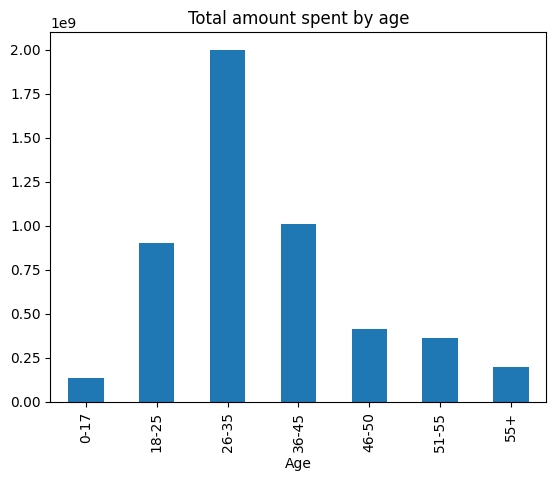

In [37]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', title = 'Total amount spent by age')

<ipython-input-38-fdaf58bd2efa>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', title = 'Average amount spent by each age group', autopct = '%.1f')


<Axes: title={'center': 'Average amount spent by each age group'}, ylabel='Purchase'>

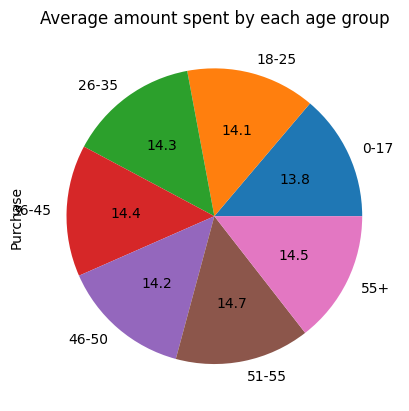

In [38]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', title = 'Average amount spent by each age group', autopct = '%.1f')

In [39]:
df['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

<Axes: >

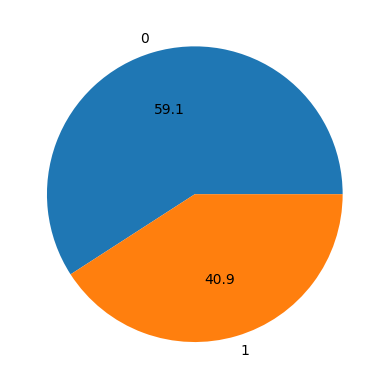

In [40]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%.1f')

# **5. Multi Column Analysis**

<Axes: xlabel='Age', ylabel='count'>

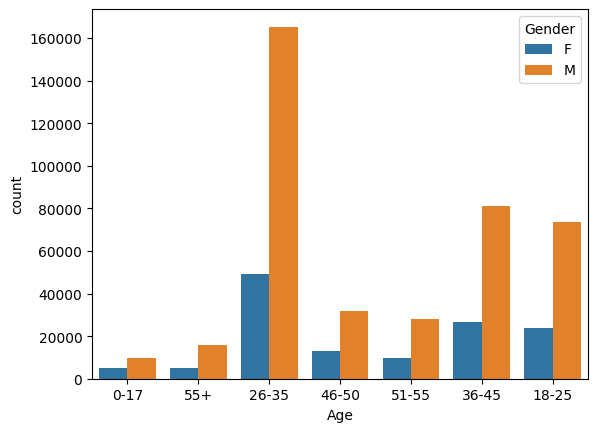

In [41]:
sns.countplot(x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

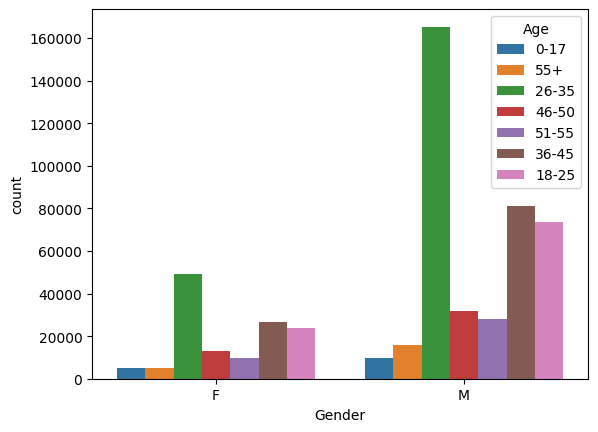

In [42]:
sns.countplot(x = 'Gender', hue = 'Age', data = df)

<Axes: xlabel='Gender', ylabel='count'>

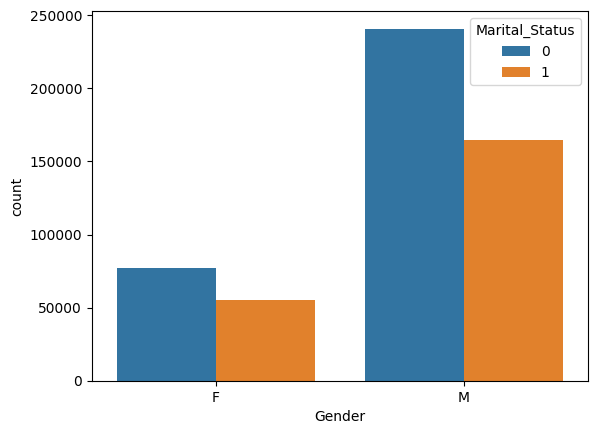

In [43]:
sns.countplot(x = 'Gender', hue = 'Marital_Status', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

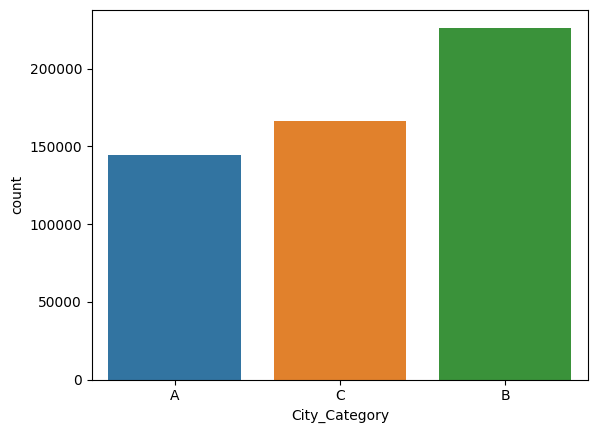

In [44]:
sns.countplot(x = df['City_Category'])

<Axes: >

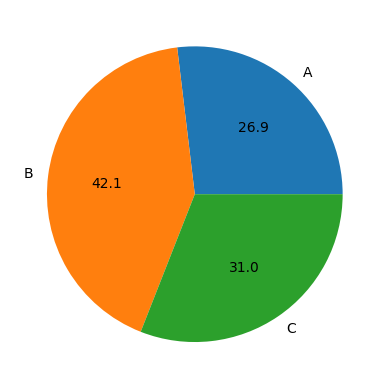

In [45]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: xlabel='City_Category', ylabel='count'>

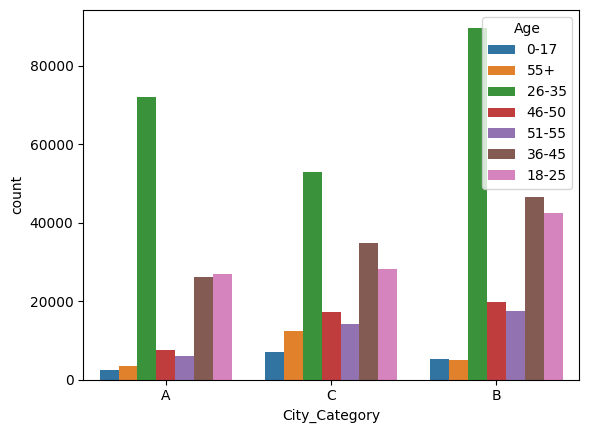

In [46]:
sns.countplot(x = df['City_Category'], hue = df['Age'])

<Axes: xlabel='City_Category', ylabel='count'>

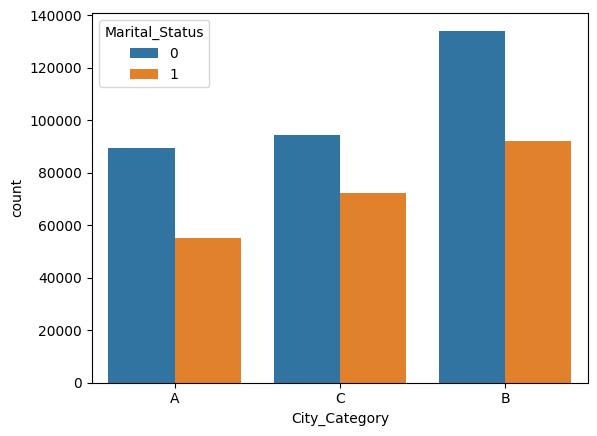

In [47]:
sns.countplot(x = df['City_Category'], hue = df['Marital_Status'])

<Axes: xlabel='City_Category', ylabel='count'>

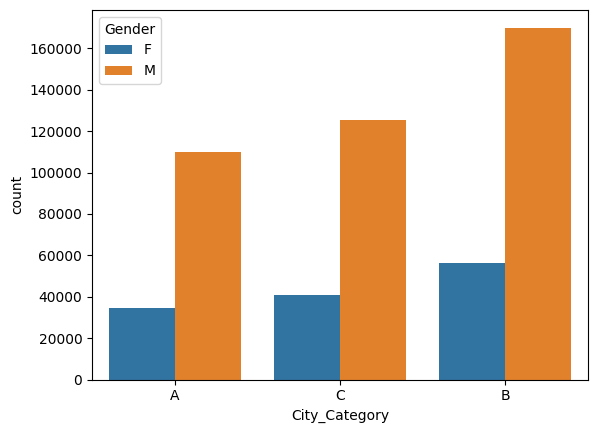

In [48]:
sns.countplot(x = df['City_Category'], hue = df['Gender'])

<ipython-input-49-f21e5eef8279>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct ='%.1f')


<Axes: ylabel='Purchase'>

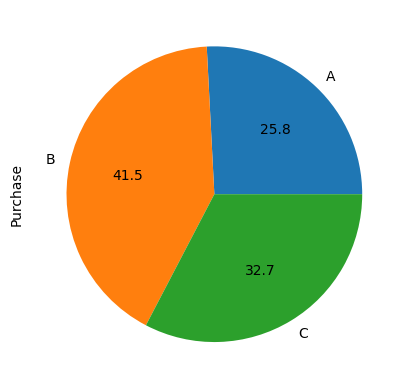

In [49]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct ='%.1f')

<ipython-input-50-c27e3a460545>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct ='%.1f')


<Axes: ylabel='Purchase'>

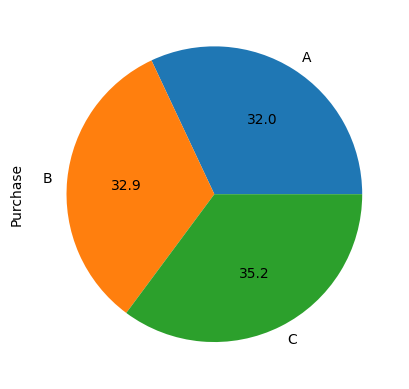

In [50]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct ='%.1f')

# **6. Occupation and Products Analysis**

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

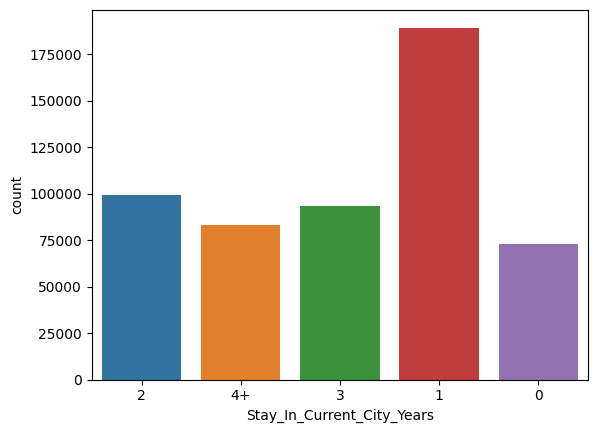

In [51]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

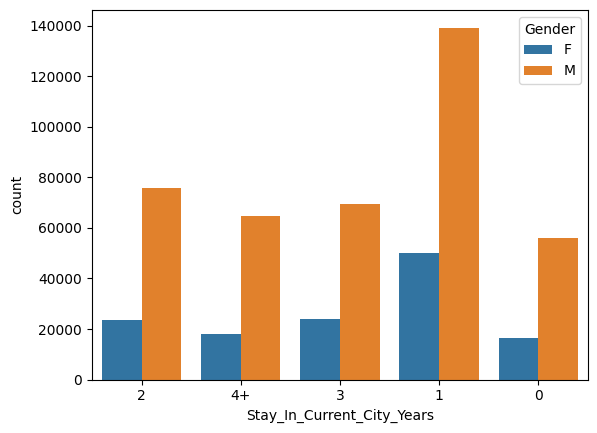

In [52]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Gender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

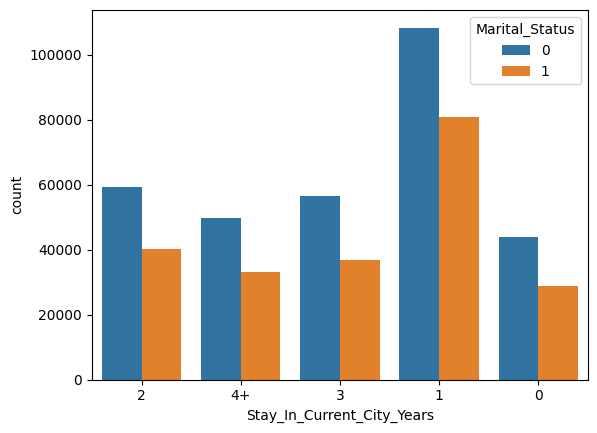

In [53]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['Marital_Status'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

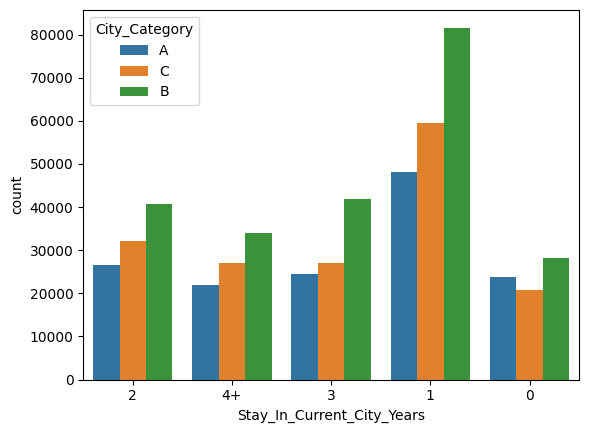

In [54]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

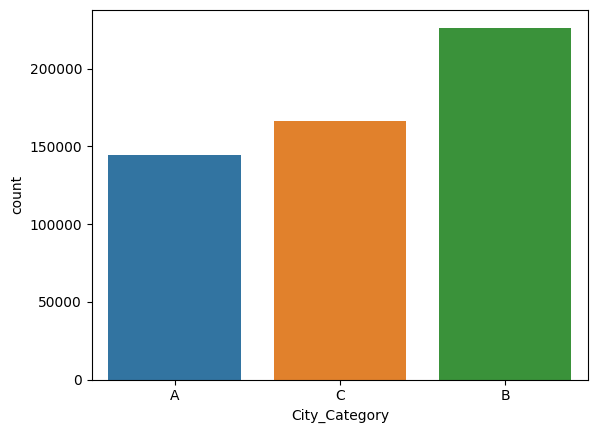

In [55]:
sns.countplot(x = df['City_Category'])

<Axes: >

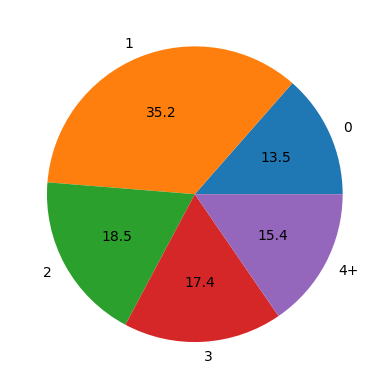

In [56]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = '%.1f')

<ipython-input-58-ca189ff49568>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

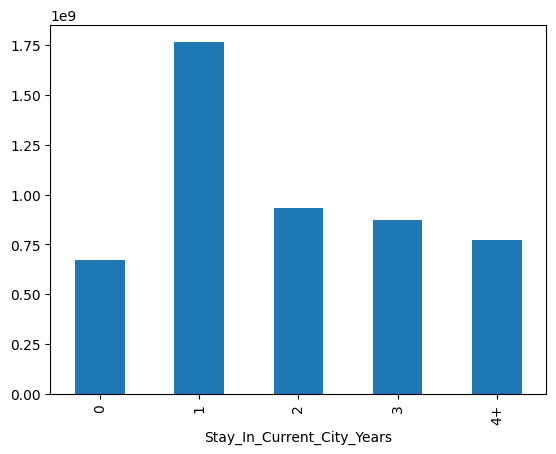

In [58]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<ipython-input-59-6007a36588e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

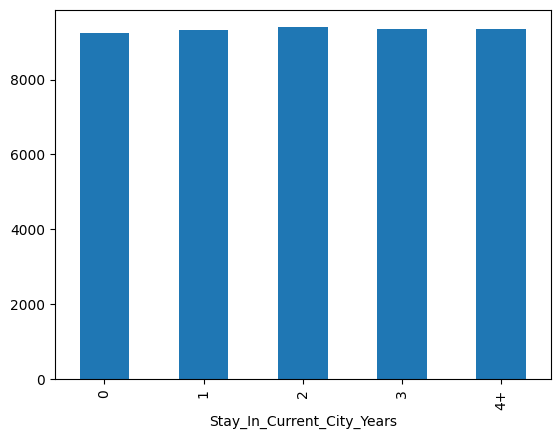

In [59]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

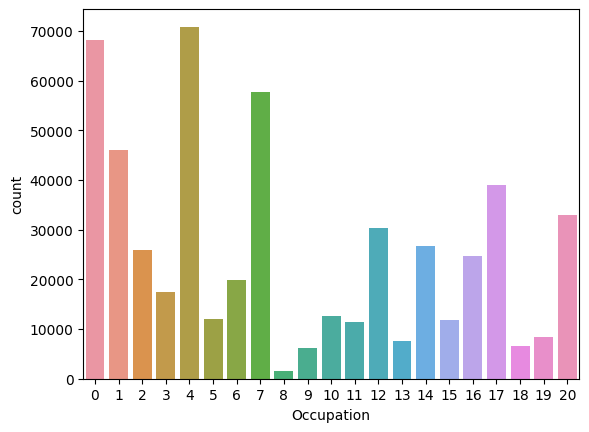

In [60]:
sns.countplot(x = df['Occupation'])

<Axes: xlabel='Occupation'>

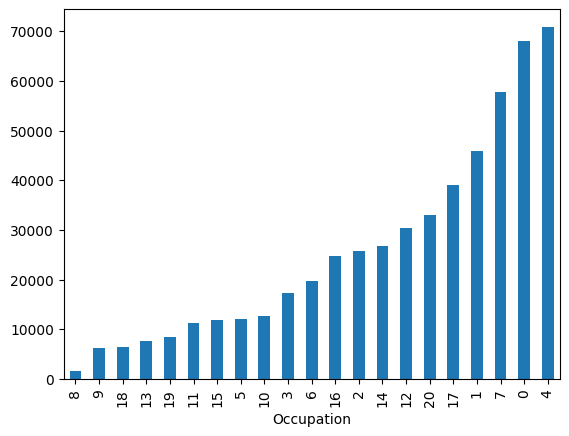

In [62]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<ipython-input-64-cf6aca9377fe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

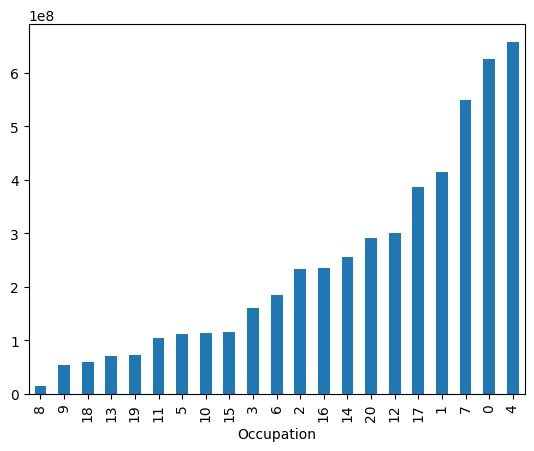

In [64]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<ipython-input-65-42db5856ab26>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

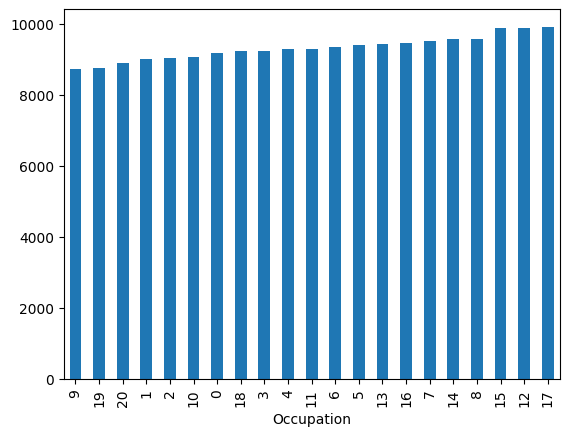

In [65]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

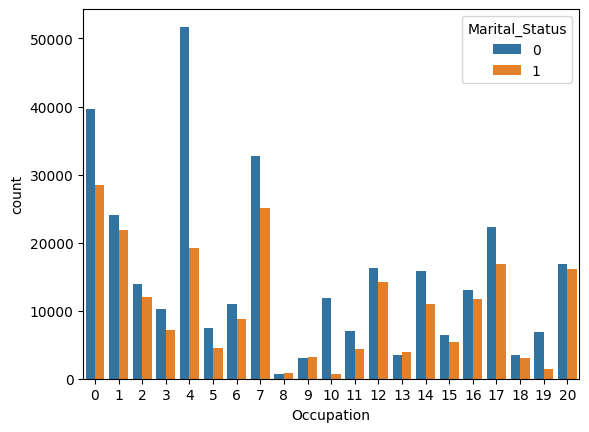

In [66]:
sns.countplot(x = df['Occupation'], hue = df['Marital_Status'])

<Axes: xlabel='Occupation', ylabel='count'>

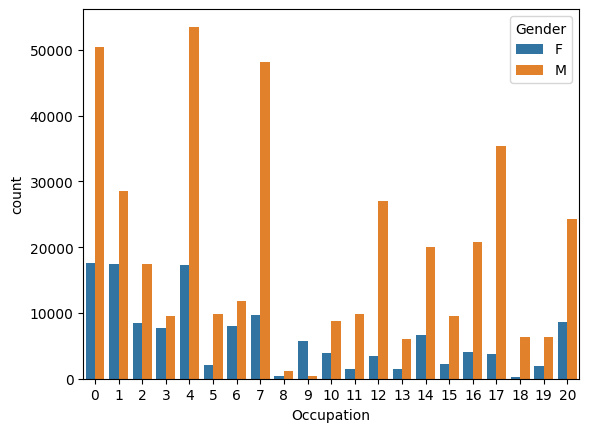

In [67]:
sns.countplot(x = df['Occupation'], hue = df['Gender'])

<Axes: xlabel='Occupation'>

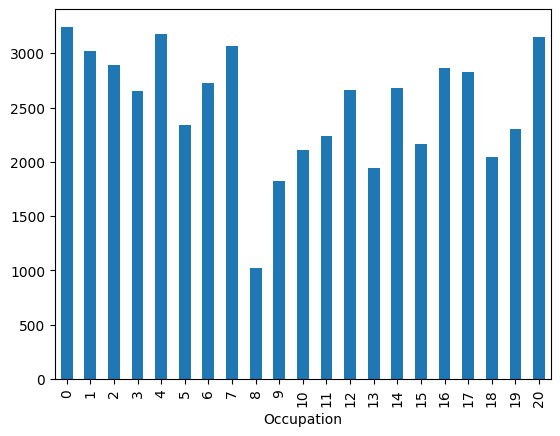

In [70]:
df.groupby('Occupation').nunique()['Product_ID'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

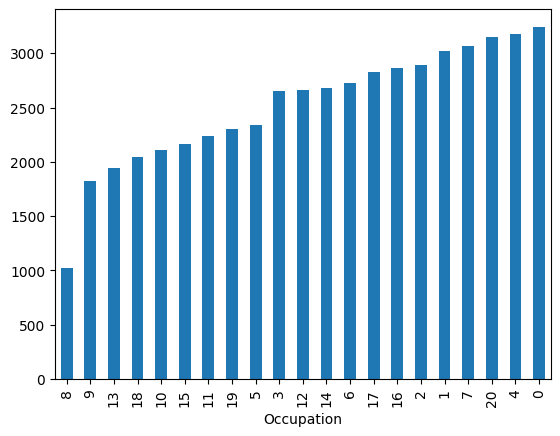

In [71]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

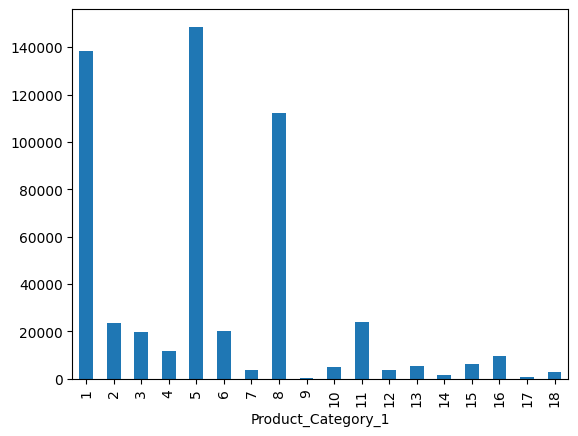

In [72]:
df.groupby('Product_Category_1').size().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

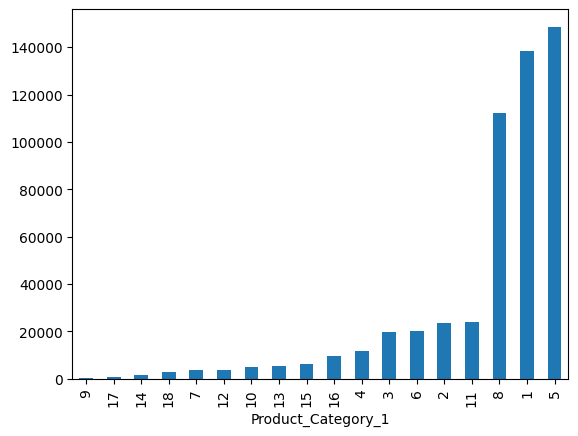

In [73]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

<ipython-input-74-ade90bdf36d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

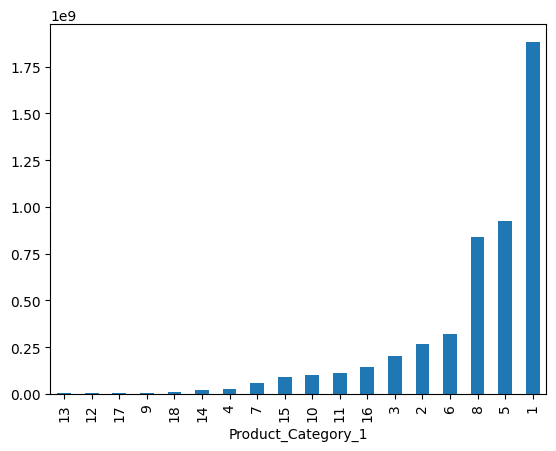

In [74]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

<ipython-input-75-e14819015757>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

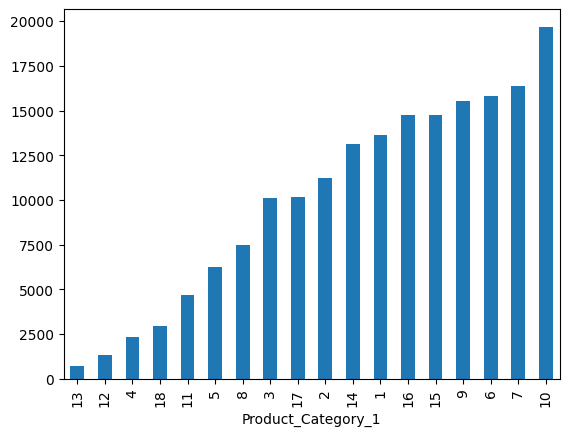

In [75]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

<ipython-input-77-d066880202a7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_ID'>

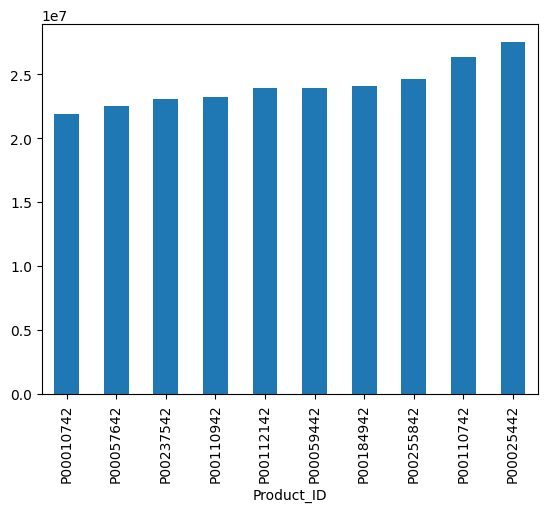

In [77]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<ipython-input-78-d1a532dff54a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_ID'>

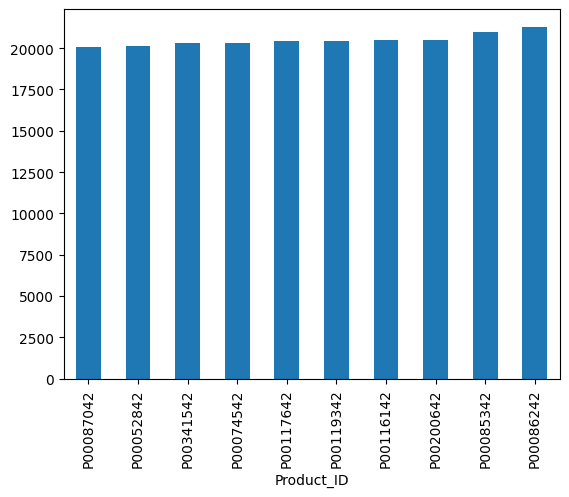

In [78]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

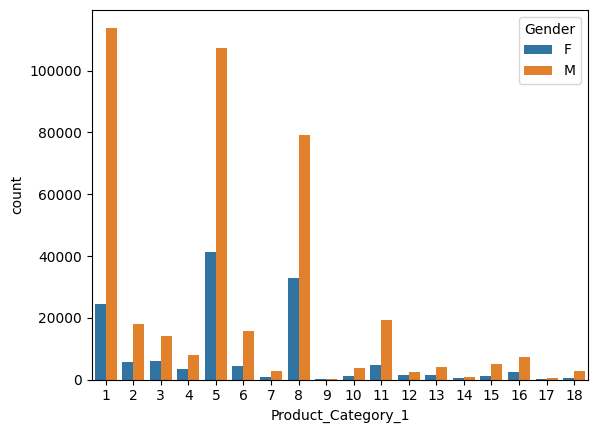

In [80]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

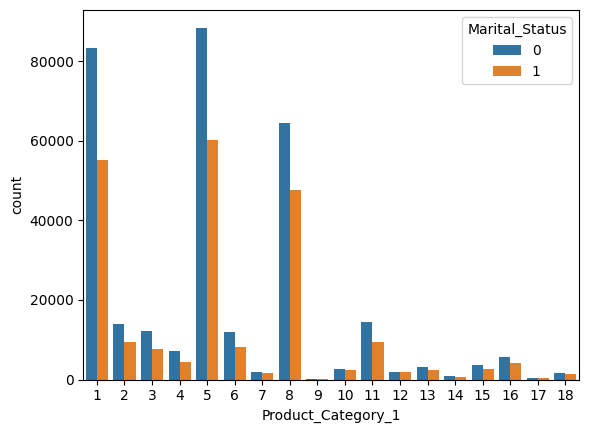

In [82]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

# **7. Combining Gender and Marital Status**

In [85]:
l = []
for i in range (len(df)):
  l.append(df['Gender'][i] + "_" + str(df['Marital_Status'][i]))

df['Marital_Gender'] = l

In [86]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

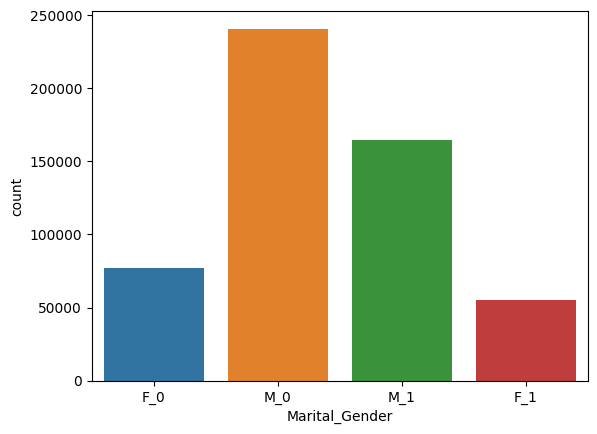

In [87]:
sns.countplot(x = df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

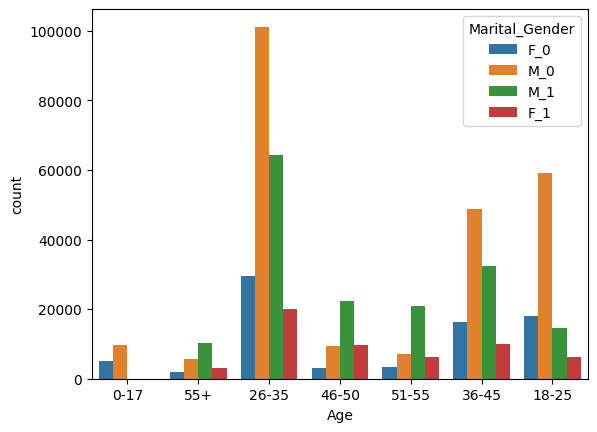

In [88]:
sns.countplot(x = 'Age', hue = 'Marital_Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

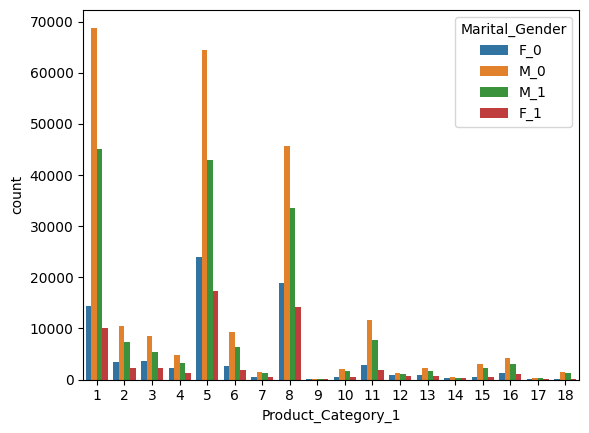

In [89]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

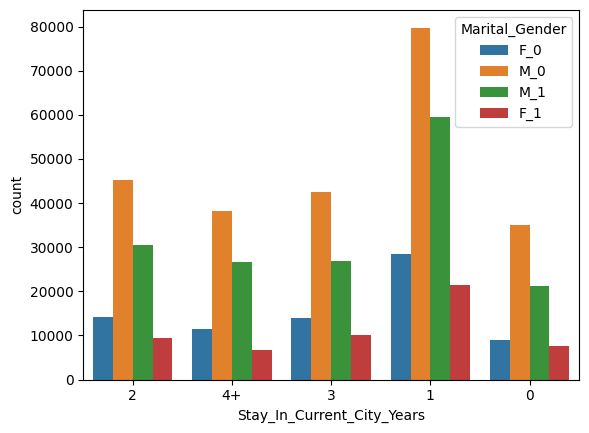

In [90]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Gender', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

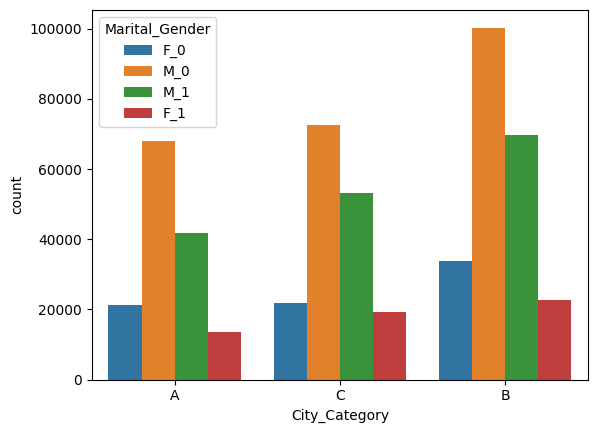

In [91]:
sns.countplot(x = 'City_Category', hue = 'Marital_Gender', data = df)